In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime 

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('./raw_dataset.csv')

In [94]:
data_location = pd.read_csv('./twint/tweets_new_with_more_than_week_location.csv')

In [95]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1435914080330547202,1435914080330547202,2021-09-09 16:02:49 IST,2021-09-09,16:02:49,530,156210222,neelimaesai,neelima esai,NaN,#Awareness #Covid_19 #vaccine #pregnancy 🤰,und,[],[],[],0,2,12,"['awareness', 'covid_19', 'vaccine', 'pregnancy']",[],https://twitter.com/neelimaesai/status/1435914080330547202,False,https://twitter.com/avalvikatan/status/1435852599522115587,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1435900870307291138,1435900870307291138,2021-09-09 15:10:19 IST,2021-09-09,15:10:19,530,569970630,abirballan,Abir Ballan,NaN,"Old but worth repeating… @pfizer CEO: «I am 59 years old, in good health. For my type, it’s not recommended to get the #COVID19 #vaccine » If only the world follows his example! https://t.co/RgD1vsvFgE",en,"[{'screen_name': 'pfizer', 'name': 'pfizer inc.', 'id': '56488059'}]",[],[],3,23,39,"['covid19', 'vaccine']",[],https://twitter.com/abirballan/status/1435900870307291138,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/1435900811444424706/pu/img/ps3m8eJzgNS7nDP8.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1435897910584127491,1435897910584127491,2021-09-09 14:58:34 IST,2021-09-09,14:58:34,530,436429668,nikkeiasia,Nikkei Asia,NaN,"As the COVID pandemic rages in Thailand, Chinese entrepreneurs are snapping up hotels, property and land at record-low prices. https://t.co/lkgF1JwsqO #COVID #coronavirus #vaccine",en,[],['https://s.nikkei.com/3jWVTFb'],[],2,7,13,"['covid', 'coronavirus', 'vaccine']",[],https://twitter.com/NikkeiAsia/status/1435897910584127491,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1435887588464865281,1435887588464865281,2021-09-09 14:17:33 IST,2021-09-09,14:17:33,530,25088746,sabcnews,SABC News,NaN,The United Nations Chief has slammed the inequity around COVID-19 #vaccine distribution globally and says he will use the upcoming #UN General Assembly to ring the alarm bell. #COVID19 https://t.co/isVfjdqIBS,en,[],['https://www.sabcnews.com/sabcnews/un-chief-slams-inequity-around-covid-19-vaccine-distribution-globally/'],[],6,2,14,"['vaccine', 'un', 'covid19']",[],https://twitter.com/SABCNews/status/1435887588464865281,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1435876683802939393,1435876683802939393,2021-09-09 13:34:13 IST,2021-09-09,13:34:13,530,587955457,shen_shiwei,Shen Shiwei沈诗伟,NaN,"🇨🇳💉China’s first mRNA COVID-19 #vaccine production base to be put into use in Oct., with an estimated annual production of 200 million doses. The mRNA jab ARcoVax is jointly developed by: The Academy of Military Medical Sciences Suzhou ABOGEN Yunnan Walvax Biotechnology Co,. https://t.co/AOFIMtExTf",en,[],[],['https://pbs.twimg.com/media/E-1BQOLWQAIIN8U.png'],0,5,20,['vaccine'],[],https://twitter.com/shen_shiwei/status/1435876683802939393,False,NaN,1,https://pbs.twimg.com/media/E-1BQOLWQAIIN8U.png,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [98]:
data_location.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [37]:
import math
import numpy as np

In [82]:
data_location['place']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
51    NaN
52    NaN
53    NaN
54    NaN
55    NaN
56    NaN
57    NaN
58    NaN
59    NaN
60    NaN
61    NaN
62    NaN
63    NaN
64    NaN
65    NaN
66    NaN
67    NaN
68    NaN
69    NaN
70    NaN
71    NaN
72    NaN
73    NaN
74    NaN
75    NaN
76    NaN
77    NaN
78    NaN
79    NaN
80    NaN
81    NaN
82    NaN
83    NaN
84    NaN
85    NaN
86    NaN
87    NaN
88    NaN
89    NaN
90    NaN
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN


In [68]:
data_location[np.isnan(data_location['geo']) == False]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


65069


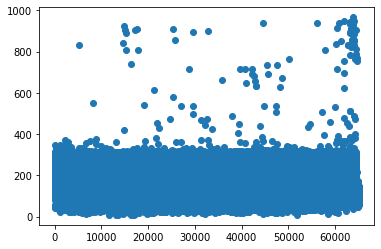

In [5]:
new_data = [len(tweet) for tweet in data['tweet'].tolist()]
print(len(new_data))
plt.scatter(np.arange(len(new_data)), new_data)
plt.show()

In [6]:
tweets = data['tweet'].tolist()

In [7]:
for tweet in tweets:
    if len(tweet) < 100:
        print(tweet)

#Awareness #Covid_19 #vaccine #pregnancy 🤰
#covidiots #vaccine  https://t.co/Sn6S53c5aY
Exactly #vaccine #VaccinesWork #GetVaccinated #Covid_19  https://t.co/mq8zpF3JQw
Done My First Jab..  #Vaccine  https://t.co/eBaZPJktzy
टीका जीत का  #vaccinated #covidshield #vaccination #vaccine  https://t.co/54ihpW0RQk
Aussie pilot speaks out. Watch this video: #Australia #Vaccine #NoJabNoJob  https://t.co/ETxE1EmK52
Ameen 🌸🎀  #Mask #Vaccine  #COVID19  #StaySafe
देश में आज वैक्सीन की 1.13 करोड़ खुराकें दी गईं। #Vaccine
Second vaccine shot been taken 🙏🏻 #Pfizer #vaccine #CovidVaccine
Today, I will go for my first jab of covid vaccine.  #vaccine #vaccination #COVID
Omw for my first jab! Finally! #vaccine #covid19
cold x-parasite #metroid #vaccine  https://t.co/yHbtbcQvc0
Your so called vaccine🚮🚮🚮 #JuliusMalema  #Bonang #etvScandal  #vaccine  https://t.co/KV0RvaxM4C
#COVID19 #vaccine  https://t.co/676UQCqUFN
Anti #Vaccine Passport Protests in France  https://t.co/km0xahTmb4
🤣🤣🤣🤣 #COVID19 #vaccine #Va

Right once again  https://t.co/WKZ87RWH4f  #AstraZeneca #vaccine   #tb4k
🌎 *ASTRA #VACCINE SHOWS 82.4% EFFICACY WITH 3-MONTH GAP: OXFORD - BBG
#vaccine લીધી હોય એ માસ્ક 😷 ન પહેરે તો ફાઇન લાગે કે નહીં?? 🤔
Study: Russia's Sputnik V #vaccine appears safe, effective @TheLancet  https://t.co/AFRMkZTeS2
I feel so sorry for people who have had just 1 #vaccine &amp; hearing this news ... #Gov #Neglect
پاکستان: کووڈ 19 ویکسین کا پہلا ٹیکا #Vaccine #COVID19  https://t.co/GQpENArDSo
Russia's Sputnik V #vaccine has 92% efficacy in trial #covid19   https://t.co/0AMBPzitTb
😳 #RosAtkins. Truth from the @bbc about #TheEU #vaccine debacle
It's not a #vaccine. It's an experimental biological agent.  Take it at your own peril.
Got first vaccine jab 💉😊  #vaccinated #vaccine
#dagenskarrikatur #brexit #vaccine via @FT  https://t.co/sd2iOiFv11
@alberttrigg @js100js100 #vaccine #uk #mRNA  https://t.co/JlbxgUljzO
Got my first shot today!! ❤️💉 #igotmyshot #vaccine  https://t.co/wQlQbznzLg
Well on the way to 10 

(9998, 36)


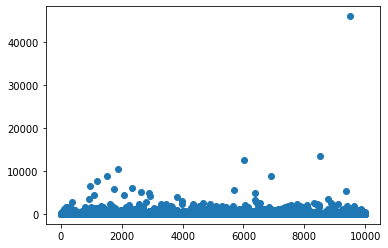

In [57]:
new_data = data_popular[data_popular['likes_count']>=10]
print(new_data.shape)
plt.scatter(np.arange(new_data.shape[0]), new_data['likes_count'].tolist())
plt.show()

In [31]:
new_data['tweet']

0                                                                                                                                                                                                                                                                           #Awareness #Covid_19 #vaccine #pregnancy 🤰
1                                                                                                           Old but worth repeating… @pfizer CEO: «I am 59 years old, in good health. For my type, it’s not recommended to get the #COVID19 #vaccine » If only the world follows his example!  https://t.co/RgD1vsvFgE
2                                                                                                                                 As the COVID pandemic rages in Thailand, Chinese entrepreneurs are snapping up hotels, property and land at record-low prices.  https://t.co/lkgF1JwsqO #COVID #coronavirus #vaccine
3                                                                  

In [20]:
min(data['created_at'])

'2021-06-12 08:48:23 IST'

In [13]:
text = data['tweet'].to_list()

In [14]:
len(text)

10030

In [19]:
mn = 10000000
cnt = 0
for t in text:
    mn = min(mn, len(t))
    if (len(t) <=20): # and len(t) <= 250):
        cnt += 1
#     print(len(t))
print(mn)
print(cnt)

12
5
